In [6]:
%reload_ext autoreload
%autoreload 2

In [7]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [13]:
# Define the path to your CSV file
file_path_news_data = '/Users/expert/Desktop/10-Academy-Week0/data/data.csv'
file_path_domains_location = '/Users/expert/Desktop/10-Academy-Week0/data/domains_location.csv'
file_path_traffic_data = '/Users/expert/Desktop/10-Academy-Week0/data/traffic.csv'


In [14]:
# Loading the datasets
news_data = pd.read_csv(file_path_news_data)
domains_location = pd.read_csv(file_path_domains_location)
traffic_data = pd.read_csv(file_path_traffic_data)

In [15]:
news_data.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content
0,89541,NaN,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...
1,89542,NaN,Prtimes.jp,NaN,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06 04:40:02.000000,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN
2,89543,NaN,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30 10:53:30.000000,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN
3,89545,NaN,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...
4,89547,NaN,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27 01:08:34.000000,"Scores of foreign citizens were killed, taken ...",Nepal,NaN


In [74]:
news_data.columns

Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'full_content'],
      dtype='object')

In [47]:
domains_location.head()

,SourceCommonName,location,Country
0,00221.info,SG,Senegal
1,01net.com,FR,France
2,01net.it,IT,Italy
3,0223.com.ar,AR,Argentina
4,022china.com,CH,China


In [17]:
traffic_data.head()

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
0,1,1,google.com,com,471274,2151358,google.com,com,1,1,471248,2147402
1,2,2,facebook.com,com,465424,2250631,facebook.com,com,2,2,465297,2247135
2,3,3,youtube.com,com,420579,1852995,youtube.com,com,3,3,420483,1848940
3,4,4,twitter.com,com,404985,1757127,twitter.com,com,4,4,404998,1753939
4,5,5,instagram.com,com,364746,1598085,instagram.com,com,5,5,364618,1594892


# Perform EDA analysis to answer the following questions
### Who are the top and bottom 10 


Websites that have the largest count of news articles

In [28]:
top_10_websites = news_data['source_name'].value_counts().head(10)
bottom_10_websites = news_data['source_name'].value_counts().tail(10)

print("Top 10")
print("\n")
print(top_10_websites)

Top 10


ETF Daily News        16631
The Times of India     7629
GlobeNewswire          5485
Forbes                 4423
Biztoc.com             3968
BBC News               3342
Globalsecurity.org     3093
Business Insider       2746
ABC News               2188
Marketscreener.com     1948
Name: source_name, dtype: int64


In [29]:
print("Bottom 10")
print("\n")
print(bottom_10_websites)


Bottom 10


Influxdata.com          1
Without.boats           1
Nota-lang.org           1
Koyeb.com               1
UW News                 1
Knowablemagazine.org    1
News.rub.de             1
Robertovitillo.com      1
Signoz.io               1
Omnigroup.com           1
Name: source_name, dtype: int64


Websites with the highest numbers of visitors traffic 

In [34]:
merged_data = pd.merge(news_data, traffic_data, left_on='source_name', right_on='Domain')
top_traffic_websites = merged_data.groupby('source_name')['GlobalRank'].max().nlargest(10)


print(top_traffic_websites)

source_name
9to5chic.com              662946
1000wordphilosophy.com    446304
2000ad.com                279008
43rumors.com              205937
pitpass.com               171990
2dopeboyz.com             143915
2chblog.jp                134659
8thlight.com               82691
tomandlorenzo.com          76402
3quarksdaily.com           53975
Name: GlobalRank, dtype: int64


Countries with the highest number of news media organisations (represented by domains in the data)

In [58]:
country_media_orgs = domains_location['Country'].value_counts()

print(country_media_orgs.head(10))


United States     14111
United Kingdom     1950
Italy              1810
France             1041
Russia             1024
Canada              887
Germany             884
China               780
Turkey              725
India               686
Name: Country, dtype: int64


Countries that have many articles written about them - the content of the news is about that country

In [62]:
merged_data = pd.merge(news_data, domains_location, left_on="source_name", right_on="SourceCommonName", how="left")

In [63]:
countries_articles = merged_data.groupby("Country").size().nlargest(10)

countries_articles.head()

Country
United States    321
Russia            31
Australia          4
France             4
dtype: int64

Websites that reported (the news content) about Africa, US, China, EU, Russia, Ukraine, Middle East? Note that you will need to group countries together to form the African, EU, and Middle East continents/regions.

In [72]:
target_countries = ["Africa", "US", "China", "EU", "Russia", "Ukraine", "Middle East"]
country_reporting_websites = merged_data[merged_data["Country"].isin(target_countries)]["source_name"].unique()

country_reporting_websites


array(['3dnews.ru'], dtype=object)

Websites with the highest count of positive, neutral, and negative sentiment? To do this you will need to group the data by website domain and apply descriptive statistics such as mean, median, and variance


In [78]:
sentiment_stats = merged_data.groupby("source_name")["category"].value_counts().unstack(fill_value=0)
sentiment_stats["Total"] = sentiment_stats.sum(axis=1)
top_sentiment_websites = sentiment_stats.nlargest(10, "Total").index

top_sentiment_websites

Index(['ETF Daily News', 'The Times of India', 'GlobeNewswire', 'Forbes',
       'Biztoc.com', 'BBC News', 'Globalsecurity.org', 'Business Insider',
       'ABC News', 'Marketscreener.com'],
      dtype='object', name='source_name')

compare the impact of using mean/average and median, 


In [83]:
mean_sentiment = sentiment_stats.mean(axis=1)
median_sentiment = sentiment_stats.median(axis=1)

mean_sentiment.head()

source_name
/FILM                     1.100775
1000wordphilosophy.com    0.007752
100daysofrealfood.com     0.069767
100layercake.com          0.015504
101cookbooks.com          0.077519
dtype: float64

In [84]:
median_sentiment.head()

source_name
/FILM                     0.0
1000wordphilosophy.com    0.0
100daysofrealfood.com     0.0
100layercake.com          0.0
101cookbooks.com          0.0
dtype: float64

check the distribution of sentiments for a particular domain (select the top 10 domains by visitors traffic) amount of news reported or vs the global news sentiment distribution)

In [87]:
top_traffic_domains = traffic_data.nlargest(10, "RefSubNets")["Domain"]
sentiment_distribution = merged_data[merged_data["source_name"].isin(top_traffic_domains)]["category"].value_counts(normalize=True)

top_traffic_domains


0              google.com
1            facebook.com
2             youtube.com
3             twitter.com
4           instagram.com
5            linkedin.com
6               apple.com
7           microsoft.com
8    googletagmanager.com
9           wikipedia.org
Name: Domain, dtype: object

Compare the content metadata across sites 


In [91]:
metadata_comparison = merged_data.groupby("source_name")[["content", "title"]].agg(lambda x: x.str.len())

metadata_comparison.head()


,content,title
source_name,,
/FILM,"[214, 214, 213, 214, 214, 214, 214, 214, 214, ...","[64, 72, 59, 97, 77, 64, 69, 86, 63, 65, 82, 7..."
1000wordphilosophy.com,213,59
100daysofrealfood.com,"[214, 214, 214, 215, 213, 214, 214, 214, 214]","[11, 26, 31, 17, 25, 26, 14, 23, 20]"
100layercake.com,"[214, 214]","[39, 49]"
101cookbooks.com,"[214, 214, 214, 214, 214, 214, 214, 214, 214, ...","[51, 20, 25, 13, 20, 23, 15, 25, 19, 19]"


How similar are the raw message lengths across sites? Check the distribution among sites

In [94]:
message_lengths = metadata_comparison["content"]
plt.figure(figsize=(10, 6))
sns.histplot(message_lengths, bins=30)
plt.title("Distribution of Raw Message Lengths Across Sites")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 1000x600 with 0 Axes>

How similar are the number of words in the title across sites? Check the distribution among sites

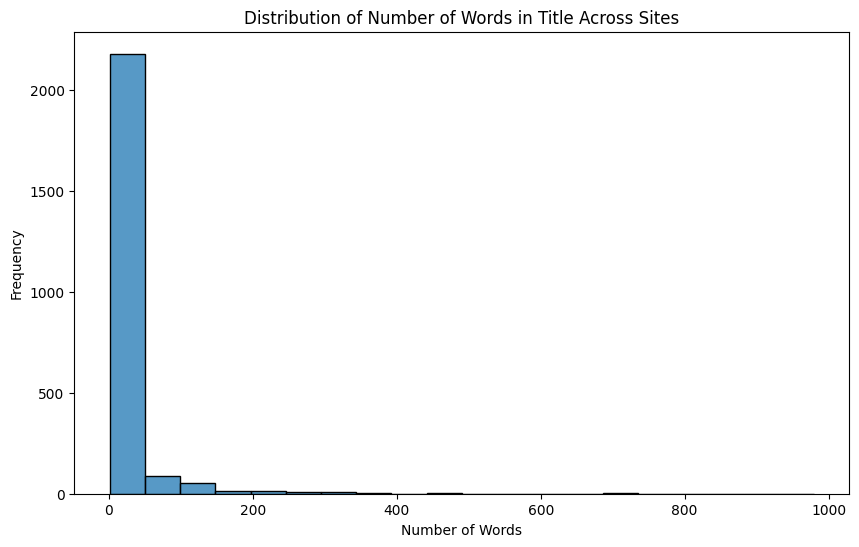

In [100]:
title_word_counts = metadata_comparison["title"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(title_word_counts, bins=20)
plt.title("Distribution of Number of Words in Title Across Sites")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

What is the impact of frequent news reporting and sentiment to the website’s global ranking? 
Do a 2D scatter plot where x-axis is the total number of reports by a website, y-axis is the global ranking of the site, and the color representing average/median sentiment.


In [102]:
merged_data["mean_sentiment"] = merged_data.groupby("source_name")["category"].transform("mean")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x="RefSubNets", y="GlobalRank", hue="mean_sentiment")
plt.title("Impact of News Reporting and Sentiment to Website's Global Ranking")
plt.xlabel("Number of Reports by Website")
plt.ylabel("Global Ranking of Site")
plt.legend(title="Average Sentiment")
plt.show()

TypeError: Could not convert PeruPeruPeruPeruRéunionCarsGhanaSingaporeSerbiaTunisiaTurkeyTurkeyTurkeyUnited StatesSouth AfricaAmericaAmericaMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesMoviesSportsSportsTravelTravelTravelTravelTravelTravelFashionFashionScienceScienceEducationLoveLovePetsPetsMeditationHistoryHistoryArtArtArtArtArtArtArtRelationshipsAnimeAnimeAnimeAnimeAnimePodcastsBeautyBeautyBeautyBeautyParentingMotivationMotivationHikingPhilosophyPsychologyPsychologyPsychologyPoetryPoetryHappinessAntarcticaAustraliaSwitzerlandChristmas IslandGermanyEgyptEgyptFinlandUnited KingdomUnited KingdomGuineaGreeceHong KongHong KongHaitiIraqItalyItalyJerseyJerseyJerseyJerseyJerseyJordanJordanJordanJordanMadagascarMexicoMexicoMexicoMexicoNigeriaNorway to numeric